In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

Cloning into 'IMagenet'...
remote: Enumerating objects: 120594, done.
remote: Total 120594 (delta 0), reused 0 (delta 0), pack-reused 120594
Receiving objects: 100% (120594/120594), 212.68 MiB | 24.46 MiB/s, done.
Resolving deltas: 100% (1115/1115), done.
Checking out files: 100% (120206/120206), done.
test  train  val  wnids.txt  words.txt


In [ ]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2 MB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.8 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import time
import itertools
import scipy.ndimage as nd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
path = 'IMagenet/tiny-imagenet-200/'

num_classes=200
examples=500

def get_id_dictionary():
    id_dict = {}
    for i, line in enumerate(open( path + 'wnids.txt', 'r')):
        id_dict[line.replace('\n', '')] = i
    #id_dict=dict(itertools.islice(id_dict.items(), num_classes))
    return id_dict
  
def get_class_to_id_dict():
    id_dict = get_id_dictionary()
    all_classes = {}
    result = {}
    for i, line in enumerate(open( path + 'words.txt', 'r')):
        n_id, word = line.split('\t')[:2]
        all_classes[n_id] = word
    for key, value in id_dict.items():
        result[value] = (key, all_classes[key])      
    return result

def get_data(id_dict):
    print('starting loading data')
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    t = time.time()
    for key, value in id_dict.items():
        train_data += [nd.imread( path + 'train/{}/images/{}_{}.JPEG'.format(key, key, str(i)), mode='RGB') for i in range(examples)]
        train_labels_ = np.array([[0]*num_classes]*examples)
        train_labels_[:, value] = 1
        train_labels += train_labels_.tolist()

    for line in open( path + 'val/val_annotations.txt'):
        img_name, class_id = line.split('\t')[:2]
        test_data.append(nd.imread( path + 'val/images/{}'.format(img_name) ,mode='RGB'))
        test_labels_ = np.array([[0]*num_classes])
        test_labels_[0, id_dict[class_id]] = 1
        test_labels += test_labels_.tolist()

    print('finished loading data, in {} seconds'.format(time.time() - t))
    return np.array(train_data), np.array(train_labels), np.array(test_data), np.array(test_labels)
  
features_train, labels_train, features_test, labels_test = get_data(get_id_dictionary())

#features_train, labels_train = get_data(get_id_dictionary())


print( "train data shape: ",  features_train.shape)
print( "train label shape: ", labels_train.shape)
print( "test data shape: ",   features_test.shape)
print( "test_labels.shape: ", labels_test.shape)

starting loading data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


finished loading data, in 54.14027214050293 seconds
train data shape:  (100000, 64, 64, 3)
train label shape:  (100000, 200)
test data shape:  (10000, 64, 64, 3)
test_labels.shape:  (10000, 200)


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print( "train data shape: ",  x_train.shape)
print( "train label shape: ", y_train.shape)
print( "test data shape: ",   x_test.shape)
print( "test_labels.shape: ", y_test.shape)

170508288/170498071 [==============================] - 13s 0us/step
train data shape:  (50000, 32, 32, 3)
train label shape:  (50000, 1)
test data shape:  (10000, 32, 32, 3)
test_labels.shape:  (10000, 1)


In [ ]:
features_train=x_train/255.
labels_train=tf.squeeze((tf.one_hot(y_train,10)))
features_test=x_test/255.
labels_test=tf.squeeze((tf.one_hot(y_test,10)))

In [ ]:
features_train=features_train/255.#x_train/255.
#labels_train=train_labels#tf.squeeze((tf.one_hot(y_train,10)))
features_test=features_test/255.#x_test/255.
#labels_test=test_labels#tf.squeeze((tf.one_hot(y_test,10)))

In [ ]:
def shuffle_data(train_data, train_labels ):
    size = len(train_data)
    train_idx = np.arange(size)
    np.random.shuffle(train_idx)
    return train_data[train_idx], train_labels[train_idx]
features_train, train_labels = shuffle_data(features_train, labels_train)

In [ ]:
from sklearn.model_selection import train_test_split
#features_train, features_test, labels_train, labels_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
#features_train=features_train/255
#features_test=features_test/255
features_train, features_test, labels_train, labels_test = train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

In [ ]:
print( "train data shape: ",  features_train.shape)
print( "train label shape: ", labels_train.shape)
#print( "test data shape: ",  features_valid.shape)
#print( "test label shape: ", labels_valid.shape)
print( "test data shape: ",  features_test.shape)
print( "test label shape: ", labels_test.shape)

train data shape:  (50000, 32, 32, 3)
train label shape:  (50000, 10)
test data shape:  (10000, 32, 32, 3)
test label shape:  (10000, 10)


In [ ]:
image_height,image_width=features_train.shape[1],features_train.shape[2]
classes=labels_train.shape[1]

In [ ]:
class MyDivideLayer(tf.keras.layers.Layer):

  def call(self, inputs):
    return tf.math.divide(inputs, 255,name='divide')

Divide = MyDivideLayer()

In [ ]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.Dropout(0.7)(x)##########
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])####################   
    x = tf.keras.layers.Activation('relu')(x)
    return x
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.Dropout(0.7)(x)##########
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])#################### 
    x = tf.keras.layers.Activation('relu')(x)
    return x
def ResNet34():
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input((image_height,image_width, 3))
    #x=Divide(x_input)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]#34 i in range 4
    #block_layers = [2, 3, 5, 2]#26 i in range 4
    #block_layers = [2,2]#10 i in range 2
    #block_layers = [1,2]#8 i in range 2
    #block_layers = [2,3]#12 i in range 2
    #block_layers = [1,1]#6 i in range 2
    #block_layers = [1]#4 i in range 1
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    model.summary()
    return model

In [ ]:
model=ResNet34()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 262, 262, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_36 (Conv2D)             (None, 131, 131, 64  9472        ['zero_padding2d_1[0][0]']       
                                )                                                          

In [ ]:
model=tf.keras.applications.resnet_v2.ResNet152V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
model.summary()

242761728/242745792 [==============================] - 3s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                     

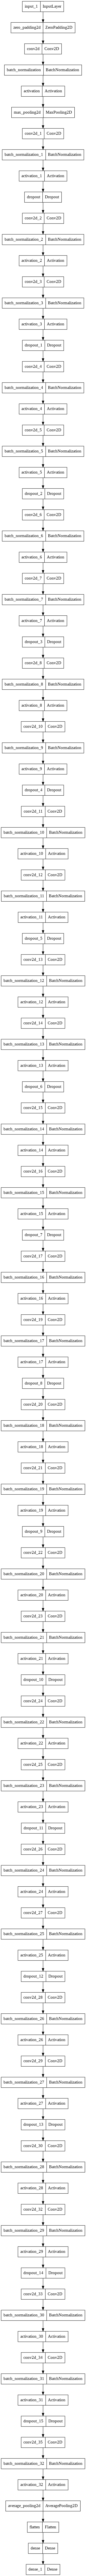

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',show_shapes=False)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
                                                          zoom_range=0.2,
                                                          horizontal_flip=True,
                                                          shear_range=0.2)
'''
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],
        shear_range=0.2,
        rescale=1/255)

datagen = ImageDataGenerator(
          featurewise_center=False,           # set input mean to 0 over the dataset
          samplewise_center=False,            # set each sample mean to 0
          featurewise_std_normalization=False,# divide inputs by std of the dataset
          samplewise_std_normalization=False, # divide each input by its std
          zca_whitening=False,                # apply ZCA whitening
          rotation_range=0,                   # randomly rotate images in the range (degrees, 0 to 180)
          width_shift_range=0.1,              # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,             # randomly shift images vertically (fraction of total height)
          horizontal_flip=True,               # randomly flip images
          vertical_flip=False )               # randomly flip images
'''

'\ndatagen = tf.keras.preprocessing.image.ImageDataGenerator(\n        rotation_range=10, # rotation\n        width_shift_range=0.2, # horizontal shift\n        height_shift_range=0.2, # vertical shift\n        zoom_range=0.2, # zoom\n        horizontal_flip=True, # horizontal flip\n        brightness_range=[0.2,1.2],\n        shear_range=0.2,\n        rescale=1/255)\n\ndatagen = ImageDataGenerator(\n          featurewise_center=False,           # set input mean to 0 over the dataset\n          samplewise_center=False,            # set each sample mean to 0\n          featurewise_std_normalization=False,# divide inputs by std of the dataset\n          samplewise_std_normalization=False, # divide each input by its std\n          zca_whitening=False,                # apply ZCA whitening\n          rotation_range=0,                   # randomly rotate images in the range (degrees, 0 to 180)\n          width_shift_range=0.1,              # randomly shift images horizontally (fraction of to

In [ ]:
datagen.fit(features_train)

In [ ]:
nb_epoch = 80 # epoch 1-10
batch_size=32
checkpoint_filepath = '/content/model/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit( datagen.flow(features_train, labels_train, batch_size=batch_size),
                     steps_per_epoch=features_train.shape[0] // batch_size,shuffle = True,
                     validation_data=(features_test, labels_test),epochs=nb_epoch)

Epoch 1/80
1562/1562 [==============================] - 70s 42ms/step - loss: 2.0963 - accuracy: 0.1689 - val_loss: 2.0935 - val_accuracy: 0.1698
Epoch 2/80
1562/1562 [==============================] - 66s 43ms/step - loss: 2.0028 - accuracy: 0.1936 - val_loss: 2.0057 - val_accuracy: 0.1912
Epoch 3/80
1562/1562 [==============================] - 65s 42ms/step - loss: 1.9633 - accuracy: 0.2105 - val_loss: 3.1376 - val_accuracy: 0.1471
Epoch 4/80
1562/1562 [==============================] - 66s 42ms/step - loss: 1.9343 - accuracy: 0.2247 - val_loss: 1.8266 - val_accuracy: 0.2302
Epoch 5/80
1562/1562 [==============================] - 66s 42ms/step - loss: 1.9127 - accuracy: 0.2259 - val_loss: 1.9586 - val_accuracy: 0.2253
Epoch 6/80
1562/1562 [==============================] - 66s 42ms/step - loss: 1.9068 - accuracy: 0.2353 - val_loss: 1.8278 - val_accuracy: 0.2409
Epoch 7/80
1562/1562 [==============================] - 68s 44ms/step - loss: 1.9002 - accuracy: 0.2389 - val_loss: 2.0276 -

In [ ]:
# Create an Instance of Early Stopping Callback.
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/1/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
history = model.fit(x = features_train, y = labels_train, epochs = 20, batch_size = 32 ,
                                             shuffle = True, validation_data=(features_test, labels_test), callbacks = [early_stopping_callback,model_checkpoint_callback])

In [ ]:
np.save("34_no_skip_yes_drop&aug_history0-80.npy",history.history)

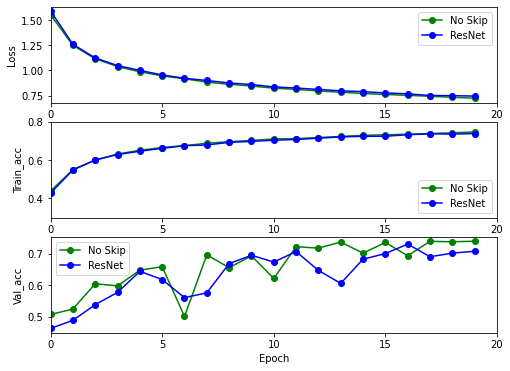

In [ ]:
no_skip=np.load("/content/4_no_skip_yes_drop&aug_history.npy",allow_pickle=True)
yes_skip=np.load("/content/4_yes_skip_yes_drop&aug_history.npy",allow_pickle=True)
epochs = range(len(no_skip.item()['accuracy']))

fig, axs = plt.subplots(3,figsize=(8,6))

axs[0].plot(epochs, no_skip.item()['loss'], 'green', label = "No Skip",marker="o")
axs[0].plot(epochs, yes_skip.item()['loss'], 'blue', label = "ResNet",marker="o")
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].set_xlim(0,20)
axs[0].set_xticks(np.arange(0, 21, 5))
axs[0].legend()

axs[1].plot(epochs, no_skip.item()['accuracy'], 'green', label = "No Skip",marker="o")
axs[1].plot(epochs, yes_skip.item()['accuracy'], 'blue', label = "ResNet",marker="o")
axs[1].set(xlabel='Epoch', ylabel='Train_acc')
axs[1].set_ylim(0.3,0.8)
axs[1].set_xlim(0,20)
axs[1].set_xticks(np.arange(0, 21, 5))
axs[1].legend()

axs[2].plot(epochs, no_skip.item()['val_accuracy'], 'green', label = "No Skip",marker="o")
axs[2].plot(epochs, yes_skip.item()['val_accuracy'], 'blue', label = "ResNet",marker="o")
axs[2].set(xlabel='Epoch', ylabel='Val_acc')
axs[2].set_xlim(0,20)
axs[2].set_xticks(np.arange(0, 21, 5))
axs[2].legend()

plt.show()

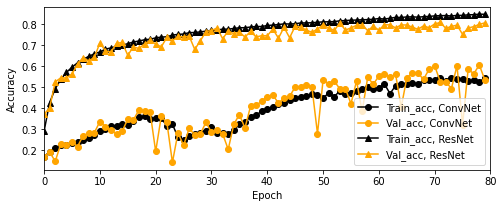

In [ ]:
no_skip=np.load("/content/drive/MyDrive/Colab Notebooks/resnet/34_no_skip_yes_drop&aug_history0-80.npy",allow_pickle=True)
yes_skip=np.load("/content/drive/MyDrive/Colab Notebooks/resnet/34_yes_skip_yes_drop&aug_history0-80.npy",allow_pickle=True)
epochs = range(len(no_skip.item()['accuracy']))

fig, axs = plt.subplots(1,figsize=(8,3))

axs.plot(epochs, no_skip.item()['accuracy'], 'black', label = "Train_acc, ConvNet",marker="o")
axs.plot(epochs, no_skip.item()['val_accuracy'], 'orange', label = "Val_acc, ConvNet",marker="o")
axs.plot(epochs, yes_skip.item()['accuracy'], 'black', label = "Train_acc, ResNet",marker="^")
axs.plot(epochs, yes_skip.item()['val_accuracy'], 'orange', label = "Val_acc, ResNet",marker="^")
axs.set(xlabel='Epoch', ylabel='Accuracy')
axs.set_xlim(0,80)
axs.set_xticks(np.arange(0, 81, 10))
axs.legend()

plt.show()

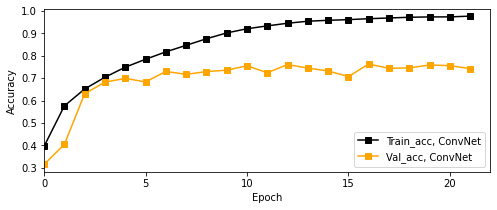

In [ ]:
no_aug=np.load("/content/drive/MyDrive/Colab Notebooks/resnet/34_no_skip_no_drop&aug_history0-22.npy",allow_pickle=True)
epochs = range(len(no_aug.item()['accuracy']))

fig, axs = plt.subplots(1,figsize=(8,3))

axs.plot(epochs, no_aug.item()['accuracy'], 'black', label = "Train_acc, ConvNet",marker="s")
axs.plot(epochs, no_aug.item()['val_accuracy'], 'orange', label = "Val_acc, ConvNet",marker="s")
axs.set(xlabel='Epoch', ylabel='Accuracy')
axs.set_xlim(0,22)
axs.set_xticks(np.arange(0, 23, 5))
axs.legend()

plt.show()

In [ ]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

In [ ]:
# Visualize the training and validation loss metrices.
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 